# Data Wrangling Project - Udacity Nanodegree
## By Ricardo Rosas

As part of my [Data Analyst Nano Degree](https://www.udacity.com/course/data-analyst-nanodegree--nd002) I am going to go through the different stages of the data wrangling process in this jupyter notebook.

From the project instructions

## Introduction
Real-world data rarely comes clean. Using Python and its libraries, you will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling. You will document your wrangling efforts in a Jupyter Notebook, plus showcase them through analyses and visualizations using Python (and its libraries) and/or SQL.

The dataset that you will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively for you to use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017. More on this soon.

### The stages of the Data Wrangling process
- Gathering Data

- Assessing Data

- Cleaning Data

## Table of contents
- [Gathering Data](#gathering_data)
- [Assessing Data](#assessing_data)
- [Cleaning Data](#cleaning_data)
- [Storing, Analyzing and visualizing the wrangled data](#storing_data)
- [Reporting on efforts and data analysis and visualizations](#reporting)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import tweepy 
import json

%matplotlib inline

<a id ='gathering_data'></a>
## Gathering Data

In this section I will proceed to gather the data needed for our wrangling. 
The different data sources/files are:

> 1) WeRateDogs twitter archive (twitter-archive-enhanced.csv'). Name = twitter_archive

> 2) Image predictions of what breed of dog it is (image_predictions.tsv) name = predictions
   Need to access these data using requests from [udacity's url](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv)
   
> 3) Each tweet's retweet count and favorite information from [tweepy](http://www.tweepy.org/) (API for twitter)
name = tweet_meta


### Import WeRateDogs Twitter archive
These data were provided in csv format from Udacity

In [2]:

twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None


In [3]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### Import image predictions
These prediction were generated through a neural network that can classify breeds of dogs. The results: a table full of image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images).

These predictions are hosted on [Udacity's website](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv) and we will access them using `requests`

In [4]:
#Import using requests
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
res = requests.get(url,verify=False) #I had an issue without the verify=False 
with open('image_predictions.tsv',mode='wb') as file:
    file.write(res.content)

C:\Udacity\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [444]:
predictions = pd.read_csv('image_predictions.tsv',sep='\t') #I used sep = '\t' after reading in in a heloful post from Stackoverflow
#https://stackoverflow.com/questions/9652832/how-to-load-a-tsv-file-into-a-pandas-dataframe Thanks @huon
predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [6]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Import tweet's metadata using Tweepy
We want to access: (1) Favorite count and (2) Retweet count for all the ids in twitter_archive
Warning from the project description:

>Tweet data is stored in JSON format by Twitter. Getting tweet JSON data via tweet ID using Tweepy is described well in this StackOverflow answer. Note that setting the tweet_mode parameter to 'extended' in the get_status call, i.e., api.get_status(tweet_id, tweet_mode='extended'), can be useful.
Also, note that the tweets corresponding to a few tweet IDs in the archive may have been deleted. Try-except blocks may come in handy here

In [7]:
#Set up of Tweepy's API
consumer_key = 'here_your_own'
consumer_secret = 'here_your_own'
access_token = 'here_your_own-here_your_own'
access_secret = 'here_your_own'

In [8]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [9]:
#Test that it works
tweet = api.get_status(892420643555336193)
print(tweet.text)

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU


In [10]:
import time #to time code

In [11]:
#Testing creating a single json file with the tweet metadata
#Idea from https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/
#Idea to add ._json https://marcobonzanini.com/2015/03/02/mining-twitter-data-with-python-part-1/
t = time.process_time()
with open('test_individual.txt',mode='w') as outfile:
    tweet_id = 892420643555336193
    tweet = api.get_status(tweet_id, tweet_mode='extended')
    json.dump(tweet._json,outfile)
print(t)

5.4288348


In [12]:
#Miniature test
df_test = list(twitter_archive['tweet_id'].sample(10))
df_test

[708853462201716736,
 667176164155375616,
 666691418707132416,
 689659372465688576,
 674790488185167872,
 799308762079035393,
 759793422261743616,
 711968124745228288,
 684097758874210310,
 787111942498508800]

In [13]:
t = time.process_time()
correct = []
incorrect = [] 
with open('tweet_meta.txt', mode='w') as outfile:
    for tweet_id in twitter_archive['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode ='extended') #Use API to gather tweets metadata
            json.dump(tweet._json,outfile) #If we dont use ._json there is an error
            outfile.write('\n') #This is to have each tweet in a new line
            correct.append(tweet_id)
        except Exception as e:
            incorrect.append(tweet_id)
print(t)

Rate limit reached. Sleeping for: 616


5.5848358


In [20]:
len(incorrect)

14

Nice! It looks like only 14 tweets could not be extracted. lets look at the proportion of tweets correctly extracted

In [21]:
len(correct)/twitter_archive.shape[0]

0.9940577249575552

In [15]:
tweet_meta = pd.read_json('tweet_meta.txt',lines=True)
tweet_meta.sample(3)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
1813,NaN,NaN,2015-12-14 15:57:56,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 676430925232627713, 'id_str'...",1449,False,Meet Duke. He's an Urban Parmesan. They know h...,NaN,...,NaN,NaN,NaN,NaN,364,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1312,NaN,NaN,2016-03-05 16:24:01,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,1565,False,This is Layla. She's giving you a standing ova...,NaN,...,NaN,NaN,NaN,NaN,413,False,NaN,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1097,NaN,NaN,2016-05-20 02:18:32,"[0, 44]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 733481999936032768, 'id_str'...",3296,False,"""Ello this is dog how may I assist"" ...10/10 h...",NaN,...,NaN,NaN,NaN,NaN,1014,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [22]:
tweet_meta.shape

(2342, 32)

In [23]:
twitter_archive.shape

(2356, 17)

In [25]:
predictions.shape

(2075, 12)

Our gathering phase is completed! We extracted all three sources of data

<a id ='assessing_data'></a>
## Assessing Data

In this section I will assess the data quality and tidiness visually and programmatically. The obsevations will be beneath

### Data Quality
The four main data quality dimensions are:
- Completeness: do we have all of the records that we should? Do we have missing records or not? Are there specific rows, columns, or cells missing?
- Validity: we have the records, but they're not valid, i.e., they don't conform to a defined schema. A schema is a defined set of rules for data. These rules can be real-world constraints (e.g. negative height is impossible) and table-specific constraints (e.g. unique key constraints in tables).
- Accuracy: inaccurate data is wrong data that is valid. It adheres to the defined schema, but it is still incorrect. Example: a patient's weight that is 5 lbs too heavy because the scale was faulty.
- Consistency: inconsistent data is both valid and accurate, but there are multiple correct ways of referring to the same thing. Consistency, i.e., a standard format, in columns that represent the same data across tables and/or within tables is desired.

### Data Tidiness
For a dataset to be considered tidy it needs to meet the following criteria:
- Each variable forms a column.
- Each observation forms a row.
- Each type of observational unit forms a table.


### Programmatic and visual assessment

In [26]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [27]:
twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
716,783821107061198850,NaN,NaN,2016-10-06 00:08:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mairi. She has mastered the art of cam...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/783821107...,12,10,Mairi,None,None,None,None
2260,667550882905632768,NaN,NaN,2015-11-20 03:51:47 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Unoriginal idea. Blatant ...,6.675484e+17,4.296832e+09,2015-11-20 03:41:59 +0000,https://twitter.com/dogratingrating/status/667...,5,10,None,None,None,None,None
727,782305867769217024,NaN,NaN,2016-10-01 19:47:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sampson. He just graduated. Ready to b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/782305867...,12,10,Sampson,doggo,None,None,None
1088,737826014890496000,NaN,NaN,2016-06-01 02:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Remy. He has some long ass ears (proba...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/737826014...,10,10,Remy,None,None,None,None
2221,668480044826800133,NaN,NaN,2015-11-22 17:23:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to DayZ. She is definitely stuck on ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668480044...,11,10,DayZ,None,None,None,None
120,869702957897576449,NaN,NaN,2017-05-30 23:51:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Stanley. He likes road trips. Will shift ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/869702957...,13,10,Stanley,None,None,None,None
1119,731285275100512256,NaN,NaN,2016-05-14 00:49:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Solomon. He's a Beneroo Cumberflop. 12...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731285275...,12,10,Solomon,None,None,None,None
1676,682088079302213632,NaN,NaN,2015-12-30 06:37:25 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",I'm not sure what this dog is doing but it's p...,NaN,NaN,NaN,https://vine.co/v/iqMjlxULzbn,12,10,None,None,None,None,None
83,876537666061221889,NaN,NaN,2017-06-18 20:30:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I can say with the pupmost confidence that the...,NaN,NaN,NaN,https://twitter.com/mpstowerham/status/8761629...,14,10,None,None,None,None,None
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None


In [30]:
#How many tweets are retweets?
twitter_archive[twitter_archive.text.str[:2] == "RT"].shape[0]

183

In [31]:
twitter_archive.duplicated().sum()

0

In [33]:
twitter_archive['name'].duplicated().sum()

1399

In [34]:
twitter_archive['name'].value_counts()

None              745
a                  55
Charlie            12
Cooper             11
Oliver             11
Lucy               11
Lola               10
Tucker             10
Penny              10
Bo                  9
Winston             9
Sadie               8
the                 8
an                  7
Toby                7
Bailey              7
Buddy               7
Daisy               7
Koda                6
Stanley             6
Bella               6
Dave                6
Jack                6
Scout               6
Oscar               6
Leo                 6
Jax                 6
Rusty               6
Milo                6
Louis               5
                 ... 
Berb                1
Beya                1
Tedrick             1
Skye                1
Dunkin              1
Crawford            1
Monty               1
Vince               1
Gabby               1
Emanuel             1
Sweets              1
Murphy              1
Benny               1
Trevith             1
Enchilada 

In [35]:
twitter_archive[twitter_archive.name == "a"]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772581559...,10,10,a,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747885874...,8,10,a,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857...,4,10,a,None,None,None,None
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a carrot. We only rate dogs. Please on...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746872823...,11,10,a,None,None,None,None
1049,743222593470234624,NaN,NaN,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a very rare Great Alaskan Bush Pupper....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743222593...,12,10,a,None,None,pupper,None
1193,717537687239008257,NaN,NaN,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",People please. This is a Deadly Mediterranean ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717537687...,11,10,a,None,None,None,None
1207,715733265223708672,NaN,NaN,2016-04-01 02:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a taco. We only rate dogs. Please only...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715733265...,10,10,a,None,None,None,None
1340,704859558691414016,NaN,NaN,2016-03-02 02:43:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a heartbreaking scene of an incredible...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704859558...,10,10,a,None,None,pupper,None


In [37]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [39]:
twitter_archive[twitter_archive.rating_denominator != 10].shape[0]

23

In [48]:
twitter_archive.query('rating_numerator > 20')[['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
188,855862651834028034,@dhmontgomery We also gave snoop dogg a 420/10...,420,10
189,855860136149123072,@s8n You tried very hard to portray this good ...,666,10
290,838150277551247360,@markhoppus 182/10,182,10
313,835246439529840640,@jonnysun @Lin_Manuel ok jomny I know you're e...,960,0
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who liv...",75,10
433,820690176645140481,The floofs have been released I repeat the flo...,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly...",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. ...,27,10
902,758467244762497024,Why does this never happen at my front door......,165,150


In [55]:
twitter_archive[twitter_archive['text'].str.contains("@")][['tweet_id','text','rating_numerator','rating_denominator']]
#Did not deliver any particular useful information

,tweet_id,text,rating_numerator,rating_denominator
19,888202515573088257,RT @dog_rates: This is Canela. She attempted s...,13,10
30,886267009285017600,@NonWhiteHat @MayhewMayhem omg hello tanner yo...,12,10
32,886054160059072513,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,12,10
36,885311592912609280,RT @dog_rates: This is Lilly. She just paralle...,13,10
55,881633300179243008,@roushfenway These are good dogs but 17/10 is ...,17,10
62,880095782870896641,Please don't send in photos without dogs in th...,11,10
64,879674319642796034,@RealKentMurphy 14/10 confirmed,14,10
68,879130579576475649,RT @dog_rates: This is Emmy. She was adopted t...,14,10
73,878404777348136964,RT @dog_rates: Meet Shadow. In an attempt to r...,13,10
74,878316110768087041,RT @dog_rates: Meet Terrance. He's being yelle...,11,10


In [56]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [57]:
predictions.shape

(2075, 12)

In [64]:
#number of values missing compared to twitter_archive
twitter_archive.tweet_id.nunique() - predictions.tweet_id.nunique() 

281

In [156]:
predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [83]:
#Check all the categories togehter
p1, p2, p3 = predictions['p1'].copy(), predictions['p2'].copy(), predictions['p3'].copy()
categories = pd.concat([p1,p2,p3])
categories.value_counts()

golden_retriever                  290
Labrador_retriever                283
Chihuahua                         185
Pembroke                          143
Cardigan                          115
Pomeranian                        109
toy_poodle                        105
pug                                97
chow                               96
cocker_spaniel                     95
French_bulldog                     93
Chesapeake_Bay_retriever           91
Eskimo_dog                         83
beagle                             77
kuvasz                             76
Siberian_husky                     72
Samoyed                            70
Staffordshire_bullterrier          70
malamute                           69
Pekinese                           63
kelpie                             62
American_Staffordshire_terrier     58
miniature_pinscher                 57
Great_Pyrenees                     55
miniature_poodle                   54
collie                             51
Italian_grey

In [157]:
predictions.sample(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
290,671166507850801152,https://pbs.twimg.com/media/CVB2TnWUYAA2pAU.jpg,1,refrigerator,0.829772,False,toilet_seat,0.030083,False,shower_curtain,0.015461,False
981,707377100785885184,https://pbs.twimg.com/media/CdEbt0NXIAQH3Aa.jpg,1,golden_retriever,0.637225,True,bloodhound,0.094542,True,cocker_spaniel,0.069797,True
187,669367896104181761,https://pbs.twimg.com/media/CUoSjTnWwAANNak.jpg,1,basset,0.749394,True,beagle,0.133579,True,Welsh_springer_spaniel,0.030198,True
1338,758467244762497024,https://pbs.twimg.com/ext_tw_video_thumb/75846...,1,Labrador_retriever,0.436377,True,Chihuahua,0.113956,True,American_Staffordshire_terrier,0.099689,True
325,671882082306625538,https://pbs.twimg.com/media/CVMBL_LWUAAsvrL.jpg,1,ski_mask,0.968325,False,mask,0.021863,False,abaya,0.005479,False
252,670717338665226240,https://pbs.twimg.com/media/CU7d2vKUcAAFZyI.jpg,1,Pomeranian,0.368161,True,Pekinese,0.350973,True,golden_retriever,0.114902,True
345,672272411274932228,https://pbs.twimg.com/media/CVRkLuJWUAAhhYp.jpg,2,pug,0.914685,True,Norwegian_elkhound,0.014982,True,Siamese_cat,0.009221,False
1244,747461612269887489,https://pbs.twimg.com/media/Cl-EXHSWkAE2IN2.jpg,1,binoculars,0.192717,False,barbershop,0.085838,False,ballplayer,0.084672,False
1452,776813020089548800,https://pbs.twimg.com/media/CsfLUDbXEAAu0VF.jpg,1,toy_poodle,0.516610,True,miniature_poodle,0.255033,True,standard_poodle,0.168989,True
1089,719332531645071360,https://pbs.twimg.com/media/CfuVGl3WEAEKb16.jpg,1,Dandie_Dinmont,0.224415,True,miniature_poodle,0.204882,True,Norfolk_terrier,0.090633,True


In [84]:
predictions[predictions.p1_dog == False]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,1.459380e-02,False,golden_retriever,7.958960e-03,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
22,666337882303524864,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,ox,0.416669,False,Newfoundland,2.784070e-01,True,groenendael,1.026430e-01,True
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
33,666430724426358785,https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg,1,llama,0.505184,False,Irish_terrier,1.041090e-01,True,dingo,6.207120e-02,False
43,666776908487630848,https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg,1,seat_belt,0.375057,False,miniature_pinscher,1.671750e-01,True,Chihuahua,8.695060e-02,True


In [85]:
tweet_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2342 non-null datetime64[ns]
display_text_range               2342 non-null object
entities                         2342 non-null object
extended_entities                2068 non-null object
favorite_count                   2342 non-null int64
favorited                        2342 non-null bool
full_text                        2342 non-null object
geo                              0 non-null float64
id                               2342 non-null int64
id_str                           2342 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 n

In [91]:
tweet_meta_simple = tweet_meta[['id','favorite_count','retweet_count']]
tweet_meta_simple.sample(10)

,id,favorite_count,retweet_count
2113,670319130621435904,3928,1261
306,835152434251116546,23632,3251
144,863079547188785154,8802,1117
1945,673576835670777856,1412,582
464,816091915477250048,9531,2364
304,835246439529840640,2196,78
27,886680336477933568,22073,4379
648,791406955684368384,14082,4536
1713,679877062409191424,2065,690
650,791026214425268224,0,4532


In [92]:
tweet_meta_simple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 3 columns):
id                2342 non-null int64
favorite_count    2342 non-null int64
retweet_count     2342 non-null int64
dtypes: int64(3)
memory usage: 55.0 KB


In [93]:
tweet_meta_simple.describe()

,id,favorite_count,retweet_count
count,2.342000e+03,2342.000000,2342.000000
mean,7.422212e+17,7981.822374,2941.923570
std,6.832408e+16,12354.766199,4947.875738
min,6.660209e+17,0.000000,0.000000
25%,6.783509e+17,1377.250000,591.000000
50%,7.186224e+17,3473.500000,1374.500000
75%,7.986971e+17,9780.250000,3430.500000
max,8.924206e+17,164599.000000,83869.000000


In [98]:
twitter_archive.shape[0] - tweet_meta_simple.shape[0]

14

### Observations

#### `tweet_meta` observations


##### Data Quality
- id is an int and not a string
- 14 missing values comparing twitter_archive and tweet_meta

##### Data tidiness
- All columns except id, favorite_count, and retweet_count are irrelevant for this analysis

####  `predictions` observations

##### Data quality
- 281 potentially missing values compared to twitter_archive
- tweet_id is an integer
- p1, p2, p3 are strings and not categories (#revision: actually, there are so many, best to let it as string)
- p1, p2, p3 consistency some lower case some capitlized
- p1_dog 543 predictions which are not dogs  


##### Data tidiness
- p1, p2, p3 names are not really informative



####  `twitter_archive`
#####  Data quality issues
- tweet_id is integer instead of string
- timestamp is not date format
- text: 183 are retweets
- Dog Stage: None instead of NaN
- Some columns (e.g. in_reply_to_status_id, retweeted_status_id) have only data for a small subset of population
- expanded_urls have 59 missing values (no media)
- type of dog does not have category data type (see also data tidiness)
- name: 745 dogs do not have name
- name: 55 dogs have name "a". Closer inspection shows that they don't have names
- name: duplicated names
- rating denominator: 23 tweets are not /10 (e.g. outlier 170)
- Whenever there's a '.', only the digits after the '.' are included in the numerator (e.g. tweet_id 832215909146226688)
- rating numerator: 24 are >20 / closer inspection shows that most are deviant from the usual rating

##### Data tidiness issues
- Breed of dog are not in only one column (violates 'each variable forms a column')


#### <a id ='cleaning_data'></a>
## Cleaning Data

In this section I will clean some of the observations that I made during the assessment phase

The observations I will clean are:

- drop all unecessary columns for `twitter_archive`, `predictions`, `tweet_meta`
- change type of tweet_id from integer to strig for `twitter_archive`, `predictions`, `tweet_meta`
- `tweet_meta` : Change column name from id to tweet_id
- `predictions`: change column names
- `predictions`: drop rows where p1 is not a dog
- `predictions`: lower case p1, p2, p3
- `twitter_archive`: change breed of dog to a single column
- `twitter_archive`: dog stage change from none to NaN
- `twitter_archive`: drop / adapt rows where denominator is not /10
- merge the relevant columns fro the three datasets into one dataframe


In [497]:
predictions = pd.read_csv('image_predictions.tsv',sep='\t') #I used sep = '\t' after reading in in a heloful post from Stackoverflow
#https://stackoverflow.com/questions/9652832/how-to-load-a-tsv-file-into-a-pandas-dataframe Thanks @huon
predictions.sample()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1295,751937170840121344,https://pbs.twimg.com/media/Cm9q2d3XEAAqO2m.jpg,1,Lakeland_terrier,0.424168,True,teddy,0.260562,False,golden_retriever,0.127432,True


In [498]:
#Create _clean dataframes
twitter_archive_clean = twitter_archive.copy()
predictions_clean = predictions.copy()
meta_data_clean = tweet_meta.copy()

In [499]:
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [500]:
#drop all unecessary columns for `twitter_archive`, `predictions`, `tweet_meta`

twitter_archive_clean = twitter_archive_clean[['tweet_id','text','timestamp','rating_numerator','rating_denominator','name','doggo','floofer','pupper','puppo','expanded_urls']]
predictions_clean.drop('img_num',axis=1,inplace=True)
meta_data_clean = meta_data_clean[['id','favorite_count','retweet_count']]


In [503]:
# tweet_meta : Change column name from id to tweet_id
meta_data_clean.rename(columns={'id':'tweet_id'},inplace=True)

In [504]:
#change type of tweet_id from integer to strig for `twitter_archive`, `predictions`, `tweet_meta`
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(str)
predictions_clean['tweet_id'] = predictions_clean['tweet_id'].astype(str)
meta_data_clean['tweet_id'] = meta_data_clean['tweet_id'].astype(str)

In [505]:
#`predictions`: change column names
predictions_clean.rename(columns={'p1':'prediction_1','p2':'prediction_2','p3':'prediction_3'},inplace=True)

In [506]:
#`predictions`: drop rows where p1 is not a dog
predictions_clean = predictions_clean[predictions_clean['p1_dog'] == True]

In [507]:
#`predictions`: lower case p1, p2, p3
predictions = ['prediction_1','prediction_2','prediction_3']
for prediction in predictions:
    predictions_clean[prediction] = predictions_clean[prediction].str.lower()

In [508]:
twitter_archive_clean.shape[0]

2356

In [509]:
twitter_archive_clean.sample(3)

,tweet_id,text,timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,expanded_urls
539,806576416489959424,Hooman catch successful. Massive hit by dog. F...,2016-12-07 19:09:37 +0000,13,10,None,None,None,None,None,https://twitter.com/deadspin/status/8065709331...
1632,684460069371654144,This is Jeph. He's a Western Sagittarius Dookm...,2016-01-05 19:42:51 +0000,10,10,Jeph,None,None,None,None,https://twitter.com/dog_rates/status/684460069...
1949,673689733134946305,When you're having a blast and remember tomorr...,2015-12-07 02:25:23 +0000,11,10,None,None,None,None,None,https://twitter.com/dog_rates/status/673689733...


In [519]:
doggo_n = twitter_archive_clean[twitter_archive_clean.doggo == 'doggo'].shape[0]
floofer_n = twitter_archive_clean[twitter_archive_clean.floofer == 'floofer'].shape[0]
pupper_n = twitter_archive_clean[twitter_archive_clean.pupper == 'pupper'].shape[0]
puppo_n = twitter_archive_clean[twitter_archive_clean.puppo == 'puppo'].shape[0]
sum_n = doggo_n + floofer_n + pupper_n + puppo_n
print('numbers of doggo: {}, floofer: {}, pupper: {}, puppo: {}, sum:{}'.format(doggo_n,floofer_n,pupper_n,puppo_n,sum_n))

numbers of doggo: 97, floofer: 10, pupper: 257, puppo: 30, sum:394


In [520]:
#- `twitter_archive`: change breed of dog to a single column
twitter_archive_clean = pd.melt(twitter_archive_clean, id_vars = ['tweet_id','timestamp','text','rating_numerator','rating_denominator','name','expanded_urls'],var_name='dog_stage',value_vars=['doggo','floofer','pupper','puppo'])

In [534]:
twitter_archive_clean.shape[0]

9424

In [533]:
twitter_archive_clean[twitter_archive_clean['tweet_id'] == '892420643555336193'] #This shows that the reason there are duplicates is because a new row is created for every category

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,expanded_urls,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,https://twitter.com/dog_rates/status/892420643...,NaN
2356,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,https://twitter.com/dog_rates/status/892420643...,NaN
4712,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,https://twitter.com/dog_rates/status/892420643...,NaN
7068,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,https://twitter.com/dog_rates/status/892420643...,NaN


In [523]:
#Clean new column dog_stage
twitter_archive_clean.drop('dog_stage',axis=1,inplace=True)
twitter_archive_clean.rename(columns={'value':'dog_stage'},inplace=True)

In [524]:
twitter_archive_clean.dog_stage.value_counts()

None       9030
pupper      257
doggo        97
puppo        30
floofer      10
Name: dog_stage, dtype: int64

In [529]:
#`twitter_archive`: dog stage change from none to NaN
twitter_archive_clean['dog_stage'].replace('None',np.NaN,inplace=True)

It seems we have more values that we should. Let's drop all the duplicated

In [550]:
twitter_archive_clean.drop_duplicates(inplace=True)

In [551]:
twitter_archive_clean.shape[0]

2750

Still some duplicated.. why? Let's look at an example

In [556]:
twitter_archive_clean[twitter_archive_clean.tweet_id.duplicated()][:1]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,expanded_urls,dog_stage
2365,890240255349198849,2017-07-26 15:59:51 +0000,This is Cassie. She is a college pup. Studying...,14,10,Cassie,https://twitter.com/dog_rates/status/890240255...,NaN


In [557]:
twitter_archive_clean[twitter_archive_clean.tweet_id == '890240255349198849']

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,expanded_urls,dog_stage
9,890240255349198849,2017-07-26 15:59:51 +0000,This is Cassie. She is a college pup. Studying...,14,10,Cassie,https://twitter.com/dog_rates/status/890240255...,doggo
2365,890240255349198849,2017-07-26 15:59:51 +0000,This is Cassie. She is a college pup. Studying...,14,10,Cassie,https://twitter.com/dog_rates/status/890240255...,NaN


Ok, so we need to remove the NaNs whenever there is an available dog_stage

In [582]:
to_drop = twitter_archive_clean[twitter_archive_clean.dog_stage.notna()]['tweet_id'].tolist()

In [621]:
twitter_archive_clean[twitter_archive_clean['tweet_id'].isin(to_drop)].shape

(774, 8)

In [635]:
twitter_archive_clean[twitter_archive_clean['dog_stage'].isna()].shape

(2356, 8)

In [636]:
to_drop_index = twitter_archive_clean[(twitter_archive_clean['tweet_id'].isin(to_drop))&(twitter_archive_clean['dog_stage'].isna())]

In [637]:
to_drop_index_list = to_drop_index.index.tolist()
len(to_drop_index_list)

380

In [638]:
for dropv in to_drop_index_list:
    twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.index != dropv] 

In [651]:
twitter_archive_clean.shape

(2370, 8)

In [650]:
twitter_archive_clean.dog_stage.value_counts()

pupper     257
doggo       97
puppo       30
floofer     10
Name: dog_stage, dtype: int64

In [653]:
twitter_archive_clean[twitter_archive_clean.tweet_id == '817777686764523521']

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,expanded_urls,dog_stage
460,817777686764523521,2017-01-07 16:59:28 +0000,"This is Dido. She's playing the lead role in ""...",13,10,Dido,https://twitter.com/dog_rates/status/817777686...,doggo
5172,817777686764523521,2017-01-07 16:59:28 +0000,"This is Dido. She's playing the lead role in ""...",13,10,Dido,https://twitter.com/dog_rates/status/817777686...,pupper


In [643]:
twitter_archive_clean[twitter_archive_clean.tweet_id.duplicated()].shape

(14, 8)

Seems there are still 14 with duplicates. Lets check those out 

In [657]:
dupli = twitter_archive_clean[twitter_archive_clean.tweet_id.duplicated()]['tweet_id'].tolist()
twitter_archive_clean[twitter_archive_clean.tweet_id.isin(dupli)].sort_values(by=['tweet_id'])[['tweet_id','text','dog_stage']]

,tweet_id,text,dog_stage
1113,733109485275860992,"Like father (doggo), like son (pupper). Both 1...",doggo
5825,733109485275860992,"Like father (doggo), like son (pupper). Both 1...",pupper
1063,741067306818797568,This is just downright precious af. 12/10 for ...,doggo
5775,741067306818797568,This is just downright precious af. 12/10 for ...,pupper
5668,751583847268179968,Please stop sending it pictures that don't eve...,pupper
956,751583847268179968,Please stop sending it pictures that don't eve...,doggo
889,759793422261743616,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",doggo
5601,759793422261743616,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",pupper
822,770093767776997377,RT @dog_rates: This is just downright precious...,doggo
5534,770093767776997377,RT @dog_rates: This is just downright precious...,pupper


Ok so it seems there are usually two dogs here... let's keep it that way 

In [678]:
#Drop columns where denominator is not 10 in twitter_archive
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.rating_denominator == 10]

In [679]:
twitter_archive_clean.sample()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,expanded_urls,dog_stage
1490,692901601640583168,2016-01-29 02:46:29,"""Fuck the system"" 10/10 https://t.co/N0OADmCnVV",10,10,None,https://twitter.com/dog_rates/status/692901601...,NaN


In [680]:
#Change timestamp format to date time
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean.timestamp)

In [681]:
#merge the relevant columns fro the three datasets into one dataframe
df_combined = pd.merge(twitter_archive_clean, predictions_clean,on='tweet_id',how='left')
df_combined = pd.merge(df_combined, meta_data_clean,on='tweet_id',how='left')

In [682]:
#Remove duplicates
df_combined.drop_duplicates(inplace=True)


### Test cleaning

In [683]:
df_combined.tail(4)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,expanded_urls,dog_stage,jpg_url,prediction_1,p1_conf,p1_dog,prediction_2,p2_conf,p2_dog,prediction_3,p3_conf,p3_dog,favorite_count,retweet_count
2343,751132876104687617,2016-07-07 19:16:47,This is Cooper. He's just so damn happy. 10/10...,10,10,Cooper,https://twitter.com/dog_rates/status/751132876...,puppo,https://pbs.twimg.com/media/CmyPXNOW8AEtaJ-.jpg,labrador_retriever,0.929390,True,chesapeake_bay_retriever,0.038254,True,golden_retriever,0.007610,True,5373.0,1410.0
2344,744995568523612160,2016-06-20 20:49:19,This is Abby. She got her face stuck in a glas...,9,10,Abby,https://twitter.com/dog_rates/status/744995568...,puppo,https://pbs.twimg.com/media/ClbBg4WWEAMjwJu.jpg,old_english_sheepdog,0.427481,True,shih-tzu,0.146336,True,tibetan_terrier,0.134269,True,3125.0,669.0
2345,743253157753532416,2016-06-16 01:25:36,This is Kilo. He cannot reach the snackum. Nif...,10,10,Kilo,https://twitter.com/dog_rates/status/743253157...,puppo,https://pbs.twimg.com/media/ClCQzFUUYAA5vAu.jpg,malamute,0.442612,True,siberian_husky,0.368137,True,eskimo_dog,0.177822,True,4455.0,1307.0
2346,738537504001953792,2016-06-03 01:07:16,This is Bayley. She fell asleep trying to esca...,11,10,Bayley,https://twitter.com/dog_rates/status/738537504...,puppo,https://pbs.twimg.com/media/Cj_P7rSUgAAYQbz.jpg,chow,0.808737,True,gibbon,0.028942,False,pembroke,0.026498,True,5352.0,1668.0


In [664]:
df_combined.shape

(2347, 20)

In [665]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2347 entries, 0 to 2346
Data columns (total 20 columns):
tweet_id              2347 non-null object
timestamp             2347 non-null datetime64[ns]
text                  2347 non-null object
rating_numerator      2347 non-null int64
rating_denominator    2347 non-null int64
name                  2347 non-null object
expanded_urls         2292 non-null object
dog_stage             394 non-null object
jpg_url               1529 non-null object
prediction_1          1529 non-null object
p1_conf               1529 non-null float64
p1_dog                1529 non-null object
prediction_2          1529 non-null object
p2_conf               1529 non-null float64
p2_dog                1529 non-null object
prediction_3          1529 non-null object
p3_conf               1529 non-null float64
p3_dog                1529 non-null object
favorite_count        2334 non-null float64
retweet_count         2334 non-null float64
dtypes: datetime64[ns](

In [666]:
twitter_archive.shape

(2356, 17)

In [667]:
df_combined.duplicated().sum()

0

In [668]:
twitter_archive_clean.head(3)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,expanded_urls,dog_stage
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,https://twitter.com/dog_rates/status/892420643...,NaN
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,10,Tilly,https://twitter.com/dog_rates/status/892177421...,NaN
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,https://twitter.com/dog_rates/status/891815181...,NaN


In [669]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2347 entries, 0 to 8151
Data columns (total 8 columns):
tweet_id              2347 non-null object
timestamp             2347 non-null datetime64[ns]
text                  2347 non-null object
rating_numerator      2347 non-null int64
rating_denominator    2347 non-null int64
name                  2347 non-null object
expanded_urls         2292 non-null object
dog_stage             394 non-null object
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 165.0+ KB


In [670]:
predictions_clean.sample(3)

,tweet_id,jpg_url,prediction_1,p1_conf,p1_dog,prediction_2,p2_conf,p2_dog,prediction_3,p3_conf,p3_dog
507,676089483918516224,https://pbs.twimg.com/media/CWHzzFGXIAA0Y_H.jpg,bull_mastiff,0.743808,True,boxer,0.106697,True,american_staffordshire_terrier,0.042335,True
304,671518598289059840,https://pbs.twimg.com/media/CVG2l9jUYAAwg-w.jpg,lakeland_terrier,0.428275,True,wire-haired_fox_terrier,0.111472,True,toy_poodle,0.105016,True
1667,812781120811126785,https://pbs.twimg.com/media/C0eUHfWUAAANEYr.jpg,bull_mastiff,0.989316,True,boxer,0.007043,True,french_bulldog,0.001740,True


In [671]:
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532 entries, 0 to 2073
Data columns (total 11 columns):
tweet_id        1532 non-null object
jpg_url         1532 non-null object
prediction_1    1532 non-null object
p1_conf         1532 non-null float64
p1_dog          1532 non-null bool
prediction_2    1532 non-null object
p2_conf         1532 non-null float64
p2_dog          1532 non-null bool
prediction_3    1532 non-null object
p3_conf         1532 non-null float64
p3_dog          1532 non-null bool
dtypes: bool(3), float64(3), object(5)
memory usage: 112.2+ KB


In [672]:
twitter_archive_clean.sample(3)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,expanded_urls,dog_stage
2115,670428280563085312,2015-11-28 02:25:32,This is Willy. He's millennial af. 11/10 https...,11,10,Willy,https://twitter.com/dog_rates/status/670428280...,NaN
457,818145370475810820,2017-01-08 17:20:31,This is Autumn. Her favorite toy is a cheesebu...,11,10,Autumn,https://twitter.com/dog_rates/status/818145370...,NaN
2064,671154572044468225,2015-11-30 02:31:34,Meet Holly. She's trying to teach small human-...,11,10,Holly,https://twitter.com/dog_rates/status/671154572...,NaN


In [673]:
meta_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 3 columns):
tweet_id          2342 non-null object
favorite_count    2342 non-null int64
retweet_count     2342 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.0+ KB


In [674]:
meta_data_clean.sample(3)

,tweet_id,favorite_count,retweet_count
342,831322785565769729,9709,1652
756,777641927919427584,0,4647
421,820837357901512704,0,7320


In [688]:
df_combined['retweet_count'].replace(np.NaN,0,inplace=True)
df_combined['favorite_count'].replace(np.NaN,0,inplace=True)

<a id = 'storing_data'></a>
## Storing, Analyzing and visualizing the wrangled data

Now that we have a combined data frame for all the data we could need for analysis we can proceed to do some visualizations as well as store the data on a convenient csv format

In [689]:
#Export to csv file
df_combined.to_csv('weratedogs_combined.csv')
meta_data_clean.to_csv('meta_data_clean.csv')
twitter_archive_clean.to_csv('twitter_archive_clean.csv')
predictions_clean.to_csv('predictions_clean.csv')


In [430]:
import seaborn as sns

In [481]:
df_combined.sample(3)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,expanded_urls,dog_stage,jpg_url,prediction_1,p1_conf,p1_dog,prediction_2,p2_conf,p2_dog,prediction_3,p3_conf,p3_dog,favorite_count,retweet_count
251,844979544864018432,2017-03-23 18:29:57,PUPDATE: I'm proud to announce that Toby is 23...,13,10,None,https://twitter.com/dog_rates/status/844979544...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14195.0,2751.0
709,784183165795655680,2016-10-07 00:06:50,This is Reginald. He's one magical puppo. Aero...,12,10,Reginald,https://vine.co/v/5ghHLBMMdlV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21550.0,8847.0
2290,666776908487630848,2015-11-18 00:36:17,This is Josep. He is a Rye Manganese mix. Can ...,5,10,Josep,https://twitter.com/dog_rates/status/666776908...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,350.0,175.0


In [686]:
df_combined['retweet_count'].isnull().sum()

13

In [687]:
df_combined['favorite_count'].replace(np.NaN,0,inplace=True)
df_combined['retweet_count'].isnull().sum()

13

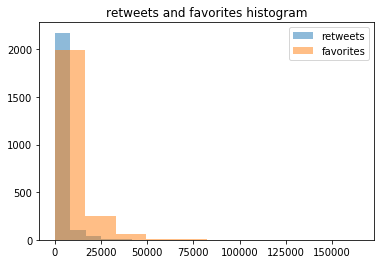

In [488]:
plt.hist(df_combined.retweet_count,alpha = 0.5, label='retweets')
plt.hist(df_combined.favorite_count,alpha = 0.5, label='favorites')
plt.title('retweets and favorites histogram')
plt.legend();

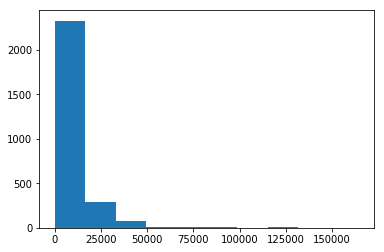

In [428]:
plt.hist(df_combined.favorite_count);

C:\Udacity\lib\site-packages\numpy\lib\function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Udacity\lib\site-packages\numpy\lib\function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


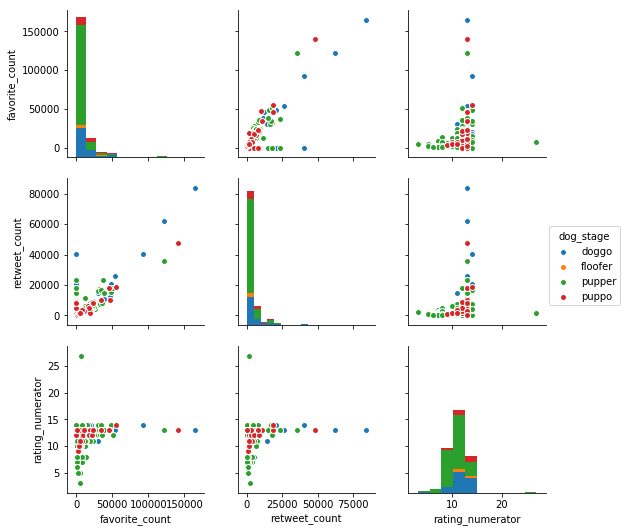

In [685]:
sns.pairplot(df_combined[['favorite_count','retweet_count','rating_numerator','dog_stage']],hue='dog_stage');

<a id = 'reporting'></a>
## Reporting on efforts and data analysis and visualizations

See other documents on github (rrosasl :) )